In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
bibles = {
    "asv": "../model_annotation/asv_out.csv",
    "fbv": "../model_annotation/fbv_out.csv",
    "kjv": "../model_annotation/kjv_out.csv",
    "web": "../model_annotation/web_out.csv",
    "wmb": "../model_annotation/wmb_out.csv",
}

In [12]:
df = pd.read_csv("annotator_labels.csv")

# extract sentiment and confidence for each bible from the data
for bible in bibles:
    df_bible = df[df["bible"] == bible]
    bible_asv = pd.read_csv(bibles[bible])
    for idx, row in df_bible.iterrows():
        chunk = row["chunk"]
        bible_sentiment = bible_asv[bible_asv["chunk"] == chunk]["sentiment"].values[0]
        bible_confidence = bible_asv[bible_asv["chunk"] == chunk]["confidence"].values[0]
        bible_chunk = bible_asv[bible_asv["chunk"] == chunk]["chunk"].values[0]
        df.loc[
            (df["bible"] == bible) & (df["chunk"] == chunk),
            "bible_sentiment",
        ] = int(bible_sentiment)

# model compared to mode of annotator labels
df["annotator_sentiment_mode"] = df.iloc[:, 2:-1].apply(lambda x: x.mode()[0], axis=1)
accuracies_mode = []
for bible in bibles:
    accuracies_mode.append(
        accuracy_score(
            df[df["bible"] == bible]["bible_sentiment"],
            df[df["bible"] == bible]["annotator_sentiment_mode"],
        )
    )

# model compared to mean of annotator labels
df["annotator_sentiment_avg"] = df.iloc[:, 2:-2].mean(axis=1).round().astype("int64")
accuracies_mean = []
for bible in bibles:
    accuracies_mean.append(
        accuracy_score(
            df[df["bible"] == bible]["bible_sentiment"],
            df[df["bible"] == bible]["annotator_sentiment_avg"],
        )
    )

# accuracy for each annotator
annotator_accuracies = []
for annotator in df.columns[2:-3]:
    annotator_accuracies.append(accuracy_score(df["bible_sentiment"], df[annotator]))

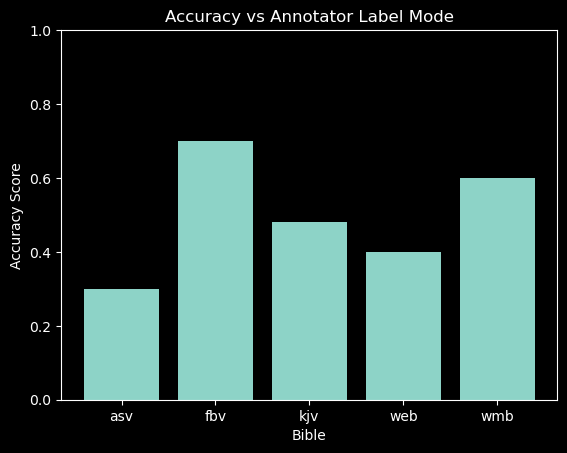

In [18]:
plt.bar(bibles.keys(), accuracies_mode)
plt.xlabel("Bible")
plt.ylabel("Accuracy Score")
plt.title("Accuracy vs Annotator Label Mode")
plt.ylim(0, 1)
plt.show()

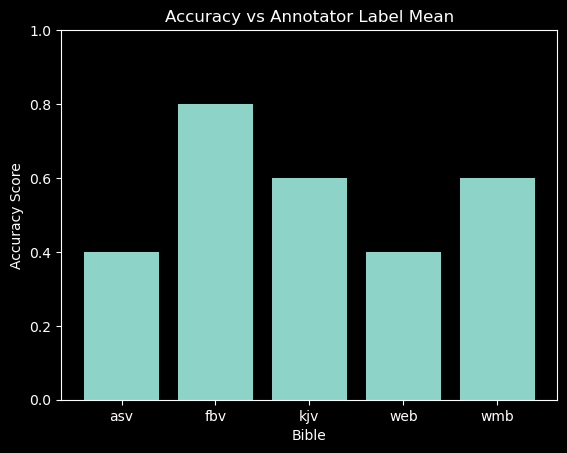

In [19]:
plt.bar(bibles.keys(), accuracies_mean)
plt.xlabel("Bible")
plt.ylabel("Accuracy Score")
plt.title("Accuracy vs Annotator Label Mean")
plt.ylim(0, 1)
plt.show()

(0.0, 1.0)

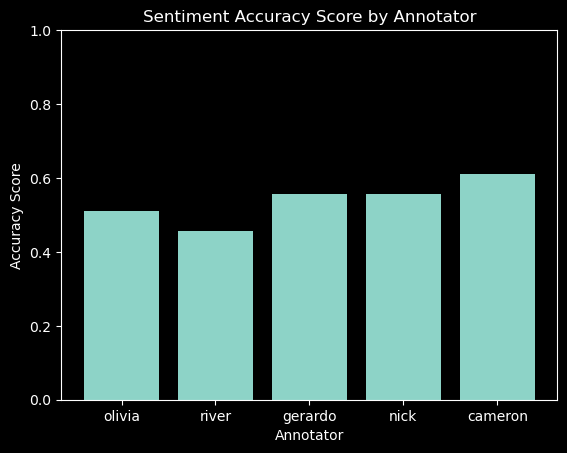

In [16]:
plt.bar(df.columns[2:-3], annotator_accuracies)
plt.xlabel("Annotator")
plt.ylabel("Accuracy Score")
plt.title("Sentiment Accuracy Score by Annotator")
plt.ylim(0, 1)